In [1481]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1482]:
data, meta = arff.loadarff("seismic-bumps.arff")
df = pd.DataFrame(data)

In [1483]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,b'a',b'a',b'N',15180.0,48.0,-72.0,-72.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
1,b'a',b'a',b'N',14720.0,33.0,-70.0,-79.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,b'0'
2,b'a',b'a',b'N',8050.0,30.0,-81.0,-78.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,b'a',b'a',b'N',28820.0,171.0,-23.0,40.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,b'0'
4,b'a',b'a',b'N',12640.0,57.0,-63.0,-52.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


In [1484]:
for col in df.columns:
    if df[col].dtype == object:  # Only decode byte strings
        df[col] = df[col].map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [1485]:
df['class'].unique()

array(['0', '1'], dtype=object)

In [1486]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [1487]:
df.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

In [1488]:
label_cols = ['seismic', 'seismoacoustic','ghazard']
le = LabelEncoder()
enc = OneHotEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])
df = pd.get_dummies(df,columns=['shift'],drop_first='True')

In [1489]:
df.head()

,seismic,seismoacoustic,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class,shift_W
0,0,0,15180.0,48.0,-72.0,-72.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False
1,0,0,14720.0,33.0,-70.0,-79.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0,False
2,0,0,8050.0,30.0,-81.0,-78.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False
3,0,0,28820.0,171.0,-23.0,40.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0,False
4,0,0,12640.0,57.0,-63.0,-52.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False


In [1490]:
from sklearn.feature_selection import VarianceThreshold

input_cols = ['seismic', 'seismoacoustic', 'genergy', 'gdenergy', 'ghazard',  'energy','shift_W']

# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
df_filtered = selector.fit_transform(df[input_cols])

# Use input_cols, not df.columns
selected_columns = [col for col, keep in zip(input_cols, selector.get_support()) if keep]

# Create reduced DataFrame
df_reduced = pd.DataFrame(df_filtered, columns=selected_columns)

In [1491]:
df_reduced.head()

,seismic,seismoacoustic,genergy,gdenergy,ghazard,energy,shift_W
0,0.0,0.0,15180.0,-72.0,0.0,0.0,0.0
1,0.0,0.0,14720.0,-70.0,0.0,2000.0,0.0
2,0.0,0.0,8050.0,-81.0,0.0,0.0,0.0
3,0.0,0.0,28820.0,-23.0,0.0,3000.0,0.0
4,0.0,0.0,12640.0,-63.0,0.0,0.0,0.0


In [1492]:
for col in df_reduced.columns:
    if col not in ['class', 'shift_W']:
        df_reduced[col] = pd.to_numeric(df_reduced[col], errors='coerce')

In [1493]:
# numeric_cols = df_reduced.select_dtypes(include='number').columns
# sns.boxplot(data=df_reduced['genergy'])

In [1494]:
X = df_reduced.iloc[:,:].values

In [1495]:
type(X)

numpy.ndarray

In [1496]:
print(X)

[[0.000e+00 0.000e+00 1.518e+04 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 1.472e+04 ... 0.000e+00 2.000e+03 0.000e+00]
 [0.000e+00 0.000e+00 8.050e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [1.000e+00 0.000e+00 2.696e+04 ... 0.000e+00 0.000e+00 1.000e+00]
 [0.000e+00 0.000e+00 1.613e+04 ... 0.000e+00 0.000e+00 1.000e+00]
 [0.000e+00 0.000e+00 1.275e+04 ... 0.000e+00 0.000e+00 1.000e+00]]


In [1497]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


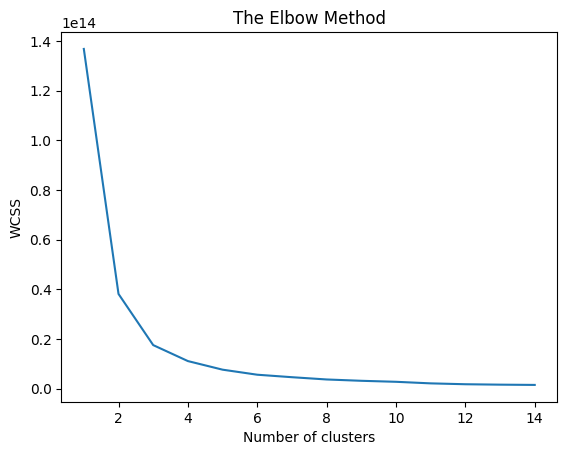

In [1498]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [1499]:
model1 = KMeans(n_clusters=3,init='k-means++',random_state=0)
model1.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0], shape=(2584,), dtype=int32)

In [1500]:
from sklearn.decomposition import PCA
labels = model1.labels_

In [1501]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

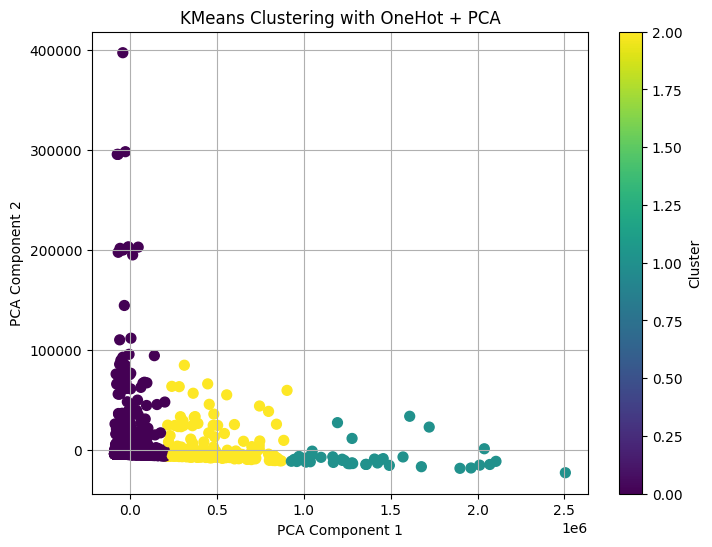

In [1502]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("KMeans Clustering with OneHot + PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

In [1503]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.99215335 0.99999988]


In [1504]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

score = silhouette_score(X_pca, labels)
print("Silhouette Score:", score)

db_score = davies_bouldin_score(X_pca, labels)
print("Davies-Bouldin Index:", db_score)

Silhouette Score: 0.8781093818710735
Davies-Bouldin Index: 0.4693551680387829


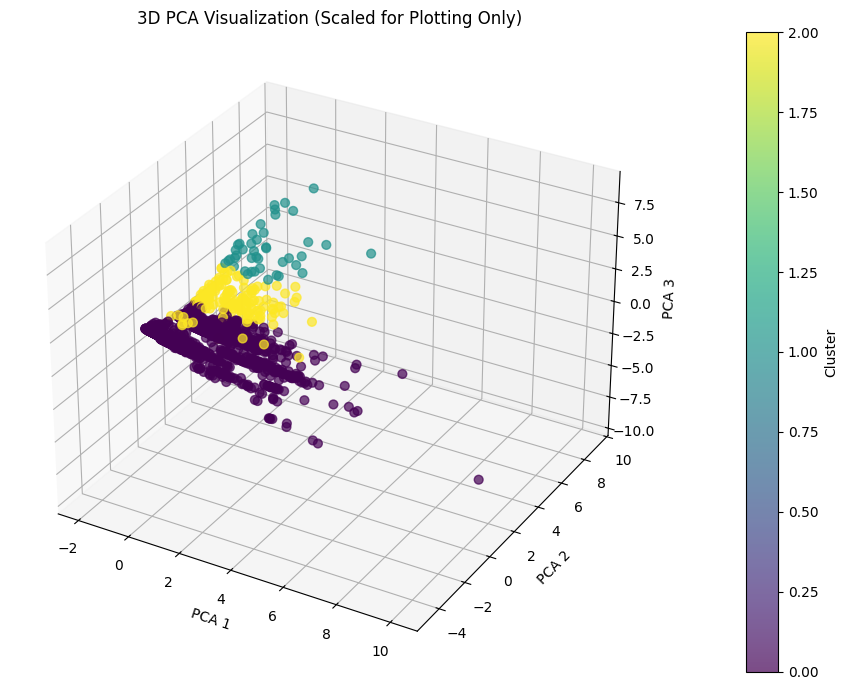

In [1505]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots

# Step 1: Scale your original data just for visualization
X_vis_scaled = StandardScaler().fit_transform(X)

# Step 2: Apply PCA to reduce to 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_vis_scaled)

# Step 3: Plot in 3D using cluster labels from original clustering
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=labels, cmap='viridis', s=40, alpha=0.7
)

ax.set_title("3D PCA Visualization (Scaled for Plotting Only)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

# Optional: Add color legend
legend = fig.colorbar(scatter, ax=ax, pad=0.1, label='Cluster')

plt.tight_layout()
plt.show()

In [1506]:
def iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)

In [ ]:
df_reduced['Cluster'] = labels
numeric_cols = df_reduced.select_dtypes(include=['number', 'bool']).columns.drop('Cluster', errors='ignore')

In [1508]:
agg_funcs = ['mean', 'min', 'max', 'std', 'median', iqr]

cluster_summary = df_reduced.groupby('Cluster')[numeric_cols].agg(agg_funcs)
cluster_summary.columns = ['_'.join([col[0], col[1] if isinstance(col[1], str) else col[1].__name__]) for col in cluster_summary.columns]
cluster_summary = cluster_summary.reset_index()

In [1509]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Avoid line wrapping
pd.set_option('display.max_colwidth', None) # Show full column content

In [1510]:
print(cluster_summary)

   Cluster  seismic_mean  seismic_min  seismic_max  seismic_std  \
0        0      0.345318          0.0          1.0     0.475571   
1        1      0.255814          0.0          1.0     0.441481   
2        2      0.436242          0.0          1.0     0.497591   

   seismic_median  seismic_iqr  seismoacoustic_mean  seismoacoustic_min  \
0             0.0          1.0             0.411789                 0.0   
1             0.0          0.5             0.488372                 0.0   
2             0.0          1.0             0.308725                 0.0   

   seismoacoustic_max  seismoacoustic_std  seismoacoustic_median  \
0                 2.0            0.529114                    0.0   
1                 2.0            0.550848                    0.0   
2                 2.0            0.491816                    0.0   

   seismoacoustic_iqr  genergy_mean  genergy_min  genergy_max    genergy_std  \
0                 1.0  3.677852e+04        100.0     292040.0   44425.856340 

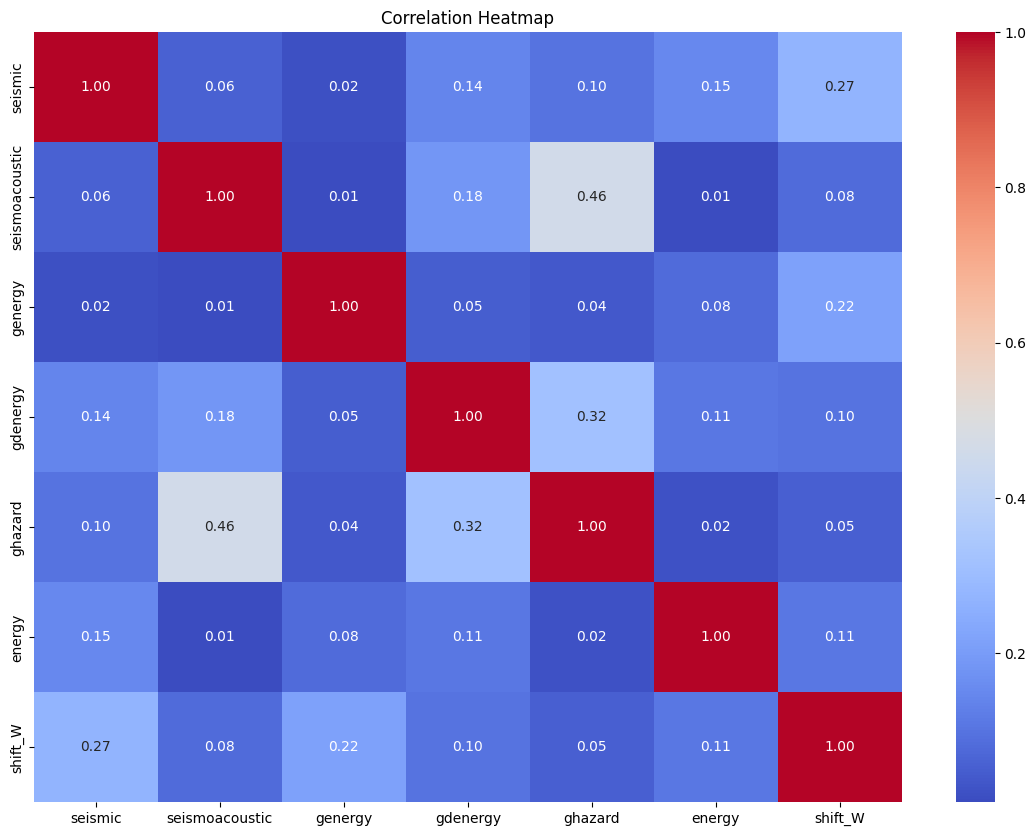

Highly correlated features (dropped): []
Remaining features: ['seismic', 'seismoacoustic', 'genergy', 'gdenergy', 'ghazard', 'energy', 'shift_W']


In [1511]:
corr_matrix = df_reduced[numeric_cols].corr().abs()

# Step 2: Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 4: Find features with correlation > 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Step 5: Keep only uncorrelated columns
uncorrelated_features = [col for col in numeric_cols if col not in to_drop]

print("Highly correlated features (dropped):", to_drop)
print("Remaining features:", uncorrelated_features)

In [1512]:
pd.crosstab(df_reduced['Cluster'], df['class'], normalize='index')

class,0,1
Cluster,,
0,0.945652,0.054348
1,0.883721,0.116279
2,0.765101,0.234899


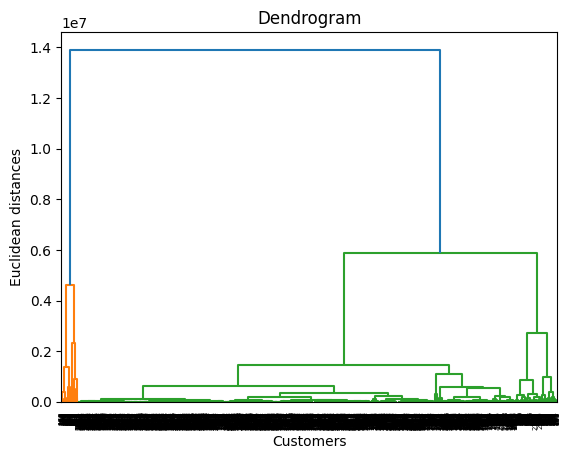

In [1513]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

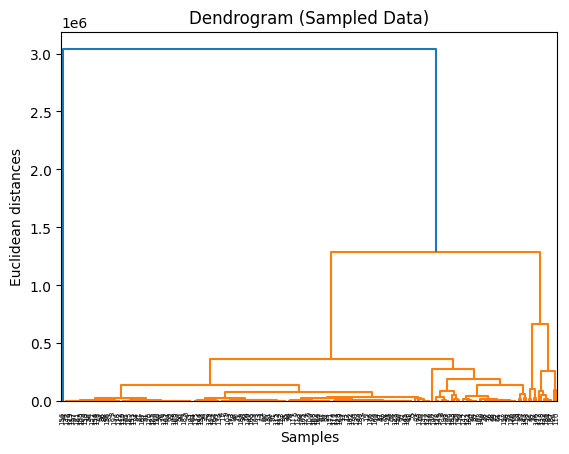

In [1514]:
sample_indices = np.random.choice(df_reduced.index, size=200, replace=False)
df_sample = df_reduced.loc[sample_indices]
dendrogram = sch.dendrogram(sch.linkage(df_sample, method = 'ward'))

plt.title("Dendrogram (Sampled Data)")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")
plt.show()

In [1515]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=2,linkage='ward')
model2.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0], shape=(2584,))

In [1516]:
from sklearn.decomposition import PCA
labels = model2.labels_

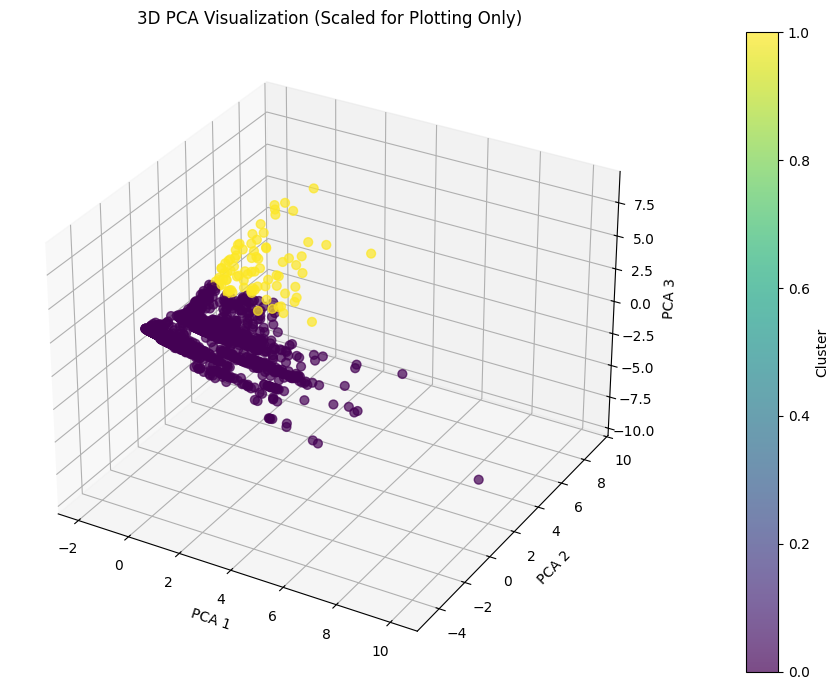

In [1517]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots

# Step 1: Scale your original data just for visualization
X_vis_scaled = StandardScaler().fit_transform(X)

# Step 2: Apply PCA to reduce to 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_vis_scaled)

# Step 3: Plot in 3D using cluster labels from original clustering
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=labels, cmap='viridis', s=40, alpha=0.7
)

ax.set_title("3D PCA Visualization (Scaled for Plotting Only)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

# Optional: Add color legend
legend = fig.colorbar(scatter, ax=ax, pad=0.1, label='Cluster')

plt.tight_layout()
plt.show()

In [1518]:
df_reduced['Cluster'] = labels
numeric_cols = df_reduced.select_dtypes(include=['number', 'bool']).columns.drop('Cluster', errors='ignore')

In [1519]:
agg_funcs = ['mean', 'min', 'max', 'std', 'median', iqr]

cluster_summary = df_reduced.groupby('Cluster')[numeric_cols].agg(agg_funcs)
cluster_summary.columns = ['_'.join([col[0], col[1] if isinstance(col[1], str) else col[1].__name__]) for col in cluster_summary.columns]
cluster_summary = cluster_summary.reset_index()

In [1520]:
print(cluster_summary)

   Cluster  seismic_mean  seismic_min  seismic_max  seismic_std  \
0        0      0.350140          0.0          1.0     0.477109   
1        1      0.317647          0.0          1.0     0.468324   

   seismic_median  seismic_iqr  seismoacoustic_mean  seismoacoustic_min  \
0             0.0          1.0             0.403361                 0.0   
1             0.0          1.0             0.517647                 0.0   

   seismoacoustic_max  seismoacoustic_std  seismoacoustic_median  \
0                 2.0            0.526105                    0.0   
1                 2.0            0.569289                    0.0   

   seismoacoustic_iqr  genergy_mean  genergy_min  genergy_max    genergy_std  \
0                 1.0  5.455480e+04        100.0     649840.0   97017.841250   
1                 1.0  1.139462e+06     664090.0    2595650.0  428510.107568   

   genergy_median  genergy_iqr  gdenergy_mean  gdenergy_min  gdenergy_max  \
0         24510.0      36460.0      12.031613    